## Crime Table Processing

#### The purpose of this notebook is to process the Crime Records table from NZ Police's victimisation records into the Crime table presented in the relational dataset. Then, crime information will be aggregated for each area unit, and this aggregated information will be joined to the main Area Unit Summary table.

Loading relevant libraries.

In [1]:
library(tidyverse)
library(dplyr)
library(ggplot2)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.3     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.0     v forcats 0.5.1

Warning message:
"package 'stringr' was built under R version 4.1.1"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



Reading in the NZ Police victimisation record csv.

In [2]:
crime <- read_csv(file = "Crime2021.csv")

Rows: 15112 Columns: 14

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (10): Occurrence Day Of Week, ANZSOC Division, Map Detail Name, ANZSOC G...
dbl  (4): Hour, Occurrence Hour Of Day, Mb2014, Number of Victimisations


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



Observing the columns in the csv file using th glimpse function.

In [3]:
glimpse(crime)

Rows: 15,112
Columns: 14
$ Hour                       <dbl> 13, 16, 0, 4, 15, 14, 19, 16, 11, 11, 22, 2~
$ `Occurrence Day Of Week`   <chr> "Sat", "Fri", "Wed", "Fri", "Mon", "Sat", "~
$ `ANZSOC Division`          <chr> "Abduction, Harassment and Other Related Of~
$ `Map Detail Name`          <chr> "Christchurch City", "Christchurch City", "~
$ `ANZSOC Group`             <chr> "Abduction and Kidnapping", "Serious Assaul~
$ `Area Unit`                <chr> "Sydenham.", "Avon-Heathcote Estuary.", "Sy~
$ `Occurrence Hour Of Day`   <dbl> 13, 16, 0, 4, 15, 14, 19, 16, 11, 11, 22, 2~
$ Region                     <chr> "Canterbury Region", "Canterbury Region", "~
$ `Territorial Authority`    <chr> "Christchurch City.", "Christchurch City.",~
$ `Year Month`               <chr> "1/02/2021", "1/08/2021", "1/08/2021", "1/0~
$ Mb2014                     <dbl> 2621701, NA, 2617300, 2629204, NA, 2594400,~
$ `REGC2014 label`           <chr> "Canterbury Region", "Canterbury Region", "~
$ `Ta2014 Nam` 

Selecting the relevant columns using the select function and viewing the first six rows of the new data frame using the head function.

In [4]:
crime <- crime %>%
          select(1, 2, 3, 6, 10, 14) 
head(crime)

Hour,Occurrence Day Of Week,ANZSOC Division,Area Unit,Year Month,Number of Victimisations
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
13,Sat,"Abduction, Harassment and Other Related Offences Against a Person",Sydenham.,1/02/2021,1
16,Fri,Acts Intended to Cause Injury,Avon-Heathcote Estuary.,1/08/2021,1
0,Wed,"Abduction, Harassment and Other Related Offences Against a Person",Sydenham.,1/08/2021,1
4,Fri,"Unlawful Entry With Intent/Burglary, Break and Enter",Middleton.,1/08/2021,1
15,Mon,Theft and Related Offences,Avon-Heathcote Estuary.,1/02/2021,1
14,Sat,"Abduction, Harassment and Other Related Offences Against a Person",Shirley West.,1/02/2021,1


Renaming the column names to be more interpretable using the rename function.

In [5]:
crime <-  crime %>%
          rename(AreaUnit = 4, MonthYear = 5, CrimeType = 3, DayOfWeek = 2, HourOfDay = 1, Victimisations = 6)
head(crime)

HourOfDay,DayOfWeek,CrimeType,AreaUnit,MonthYear,Victimisations
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
13,Sat,"Abduction, Harassment and Other Related Offences Against a Person",Sydenham.,1/02/2021,1
16,Fri,Acts Intended to Cause Injury,Avon-Heathcote Estuary.,1/08/2021,1
0,Wed,"Abduction, Harassment and Other Related Offences Against a Person",Sydenham.,1/08/2021,1
4,Fri,"Unlawful Entry With Intent/Burglary, Break and Enter",Middleton.,1/08/2021,1
15,Mon,Theft and Related Offences,Avon-Heathcote Estuary.,1/02/2021,1
14,Sat,"Abduction, Harassment and Other Related Offences Against a Person",Shirley West.,1/02/2021,1


The MonthYear columns contains entries which resemble a date. However, the date is obsolete as it just represents the date all the crime records from the previous months were updated by the police department. Thus, only the month and year component is useful. So, this column is split into separate Month and Year columns in the cell below. Using the mutate function, the Year and Month columns are created based on the values in the MonthYear colum. The values for the Year column is extracted by the substring function indexing the sixth to ninth values in the MonthYear column entries. The values for the Month column is extracted by the substring function indexing the third to fourth values in the MonthYear column entries. 

In [6]:
final_crime <- crime %>%
                  mutate(Year = substr(MonthYear, 6, 9)) %>%
                  mutate(Month = substr(MonthYear, 3, 4)) %>%
                  select(c(-MonthYear))

The Area Unit column entries have an unnecessary "." symbol at the end. This is removed using the mutate function to access the entries of the Area Unit column and using the str_remove function to remove the "." string from each entry.

In [7]:
final_crime <- final_crime %>%
                 mutate(AreaUnit = str_remove(AreaUnit, '[.]'))

The Year, Month and HourOfDay column column were transformed to the numeric data type.

In [8]:
final_crime$Year <- as.numeric(final_crime$Year)
final_crime$Month <- as.numeric(final_crime$Month)
final_crime$HourOfDay <- as.numeric(final_crime$HourOfDay)

The crime table is now as follows.

In [9]:
head(final_crime)

HourOfDay,DayOfWeek,CrimeType,AreaUnit,Victimisations,Year,Month
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
13,Sat,"Abduction, Harassment and Other Related Offences Against a Person",Sydenham,1,2021,2
16,Fri,Acts Intended to Cause Injury,Avon-Heathcote Estuary,1,2021,8
0,Wed,"Abduction, Harassment and Other Related Offences Against a Person",Sydenham,1,2021,8
4,Fri,"Unlawful Entry With Intent/Burglary, Break and Enter",Middleton,1,2021,8
15,Mon,Theft and Related Offences,Avon-Heathcote Estuary,1,2021,2
14,Sat,"Abduction, Harassment and Other Related Offences Against a Person",Shirley West,1,2021,2


Next, we aim to find the most common crime type occurrence in each area unit. The Mode function finds the modal value in a list of values.

In [10]:
Mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

The mode function is applied to each area unit group, and a column storing these modal crime types for each area unit is created in the crime table. 

In [11]:
common_crime_by_area <- final_crime %>%
                  group_by(AreaUnit) %>%
                  mutate(Commonest_Crime = Mode(CrimeType)) 
common_crime_by_area

HourOfDay,DayOfWeek,CrimeType,AreaUnit,Victimisations,Year,Month,Commonest_Crime
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
13,Sat,"Abduction, Harassment and Other Related Offences Against a Person",Sydenham,1,2021,2,Theft and Related Offences
16,Fri,Acts Intended to Cause Injury,Avon-Heathcote Estuary,1,2021,8,Theft and Related Offences
0,Wed,"Abduction, Harassment and Other Related Offences Against a Person",Sydenham,1,2021,8,Theft and Related Offences
4,Fri,"Unlawful Entry With Intent/Burglary, Break and Enter",Middleton,1,2021,8,Theft and Related Offences
15,Mon,Theft and Related Offences,Avon-Heathcote Estuary,1,2021,2,Theft and Related Offences
14,Sat,"Abduction, Harassment and Other Related Offences Against a Person",Shirley West,1,2021,2,Theft and Related Offences
19,Tue,Theft and Related Offences,Inlets-Banks Peninsula Bays,1,2021,2,Theft and Related Offences
16,Sun,Theft and Related Offences,Avon-Heathcote Estuary,1,2021,3,Theft and Related Offences
11,Mon,"Unlawful Entry With Intent/Burglary, Break and Enter",Spreydon,1,2020,9,Theft and Related Offences


From the full table, a unique list of area units and their most common crime type is generated using the unique function.

In [12]:
mode_crime <- unique(select(common_crime_by_area, AreaUnit, Commonest_Crime))

The crime table is grouped by the area unit and the number of crime occurrences in each group are tallied up to form a total crime column. The dataframe was reordered to have a descending order of total crime. Then, the commonest crime table was left joined onto the total crime table. The final joined table contains the total crime and the most common crime type for each area unit.

In [13]:
crime_by_area <- final_crime %>%
                    group_by(AreaUnit) %>%
                    tally(Victimisations) %>%
                    arrange(desc(n)) %>%
                    rename(Total_Crime = 2)
crime_by_area <- crime_by_area %>%
                    left_join(mode_crime, by='AreaUnit')
head(crime_by_area)

AreaUnit,Total_Crime,Commonest_Crime
<chr>,<dbl>,<chr>
Cathedral Square,1612,Theft and Related Offences
Linwood East,655,Theft and Related Offences
Northcote,539,Theft and Related Offences
Shirley East,534,Theft and Related Offences
Riccarton,454,Theft and Related Offences
Sydenham,416,Theft and Related Offences


The table above will be joined to another table called area summary table, with Area Unit as the key. Hence, the dataframe is saved as a csv file.

In [14]:
crime_by_area %>%
  write_csv("crime_by_area.csv")

Further insights are produced from the crime table. Firstly, the crime table is then grouped by HourOfDay and the total crime is tallied up for each hour of day.

In [15]:
crime_by_hour <- final_crime %>%
                  group_by(HourOfDay) %>%
                  tally(Victimisations)%>%
                  arrange(desc(n))%>%
                  rename(Total_Crime = 2)

Then, the crime table is grouped by Day Of Week and the total crime tallied for each day. The string day label is recoded to numerical labels.

In [22]:
crime_by_day <- final_crime %>%
                  group_by(DayOfWeek) %>%
                  tally(Victimisations)%>%
                  rename(Total_Crime = 2)
crime_by_day$day_number <- recode(crime_by_day$DayOfWeek, 
       "Sun" = "0",
       "Mon" = "1",
       "Tue" = "2",
       "Wed" = "3",
       "Thu" = "4",
       "Fri" = "5",
       "Sat" = "6")

The total crime is plotted against hour of day using the ggplot function.

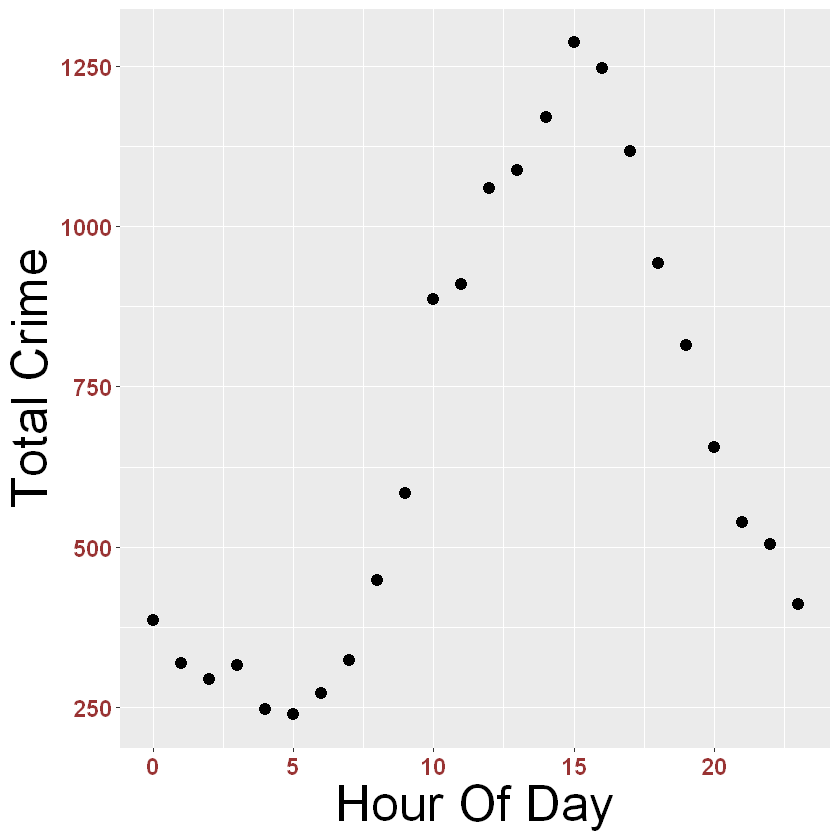

In [30]:
p <- ggplot(crime_by_hour, aes(x=HourOfDay, y=Total_Crime))
p + geom_point(size=3) + theme(text = element_text(size=30), axis.text.x = element_text(face="bold", color="#993333", 
                           size=14, angle=0),
          axis.text.y = element_text(face="bold", color="#993333", 
                           size=14, angle=0)) + labs(x = "Hour Of Day", y = "Total Crime")


The total crime is plotted against day of week usign the ggplot function.

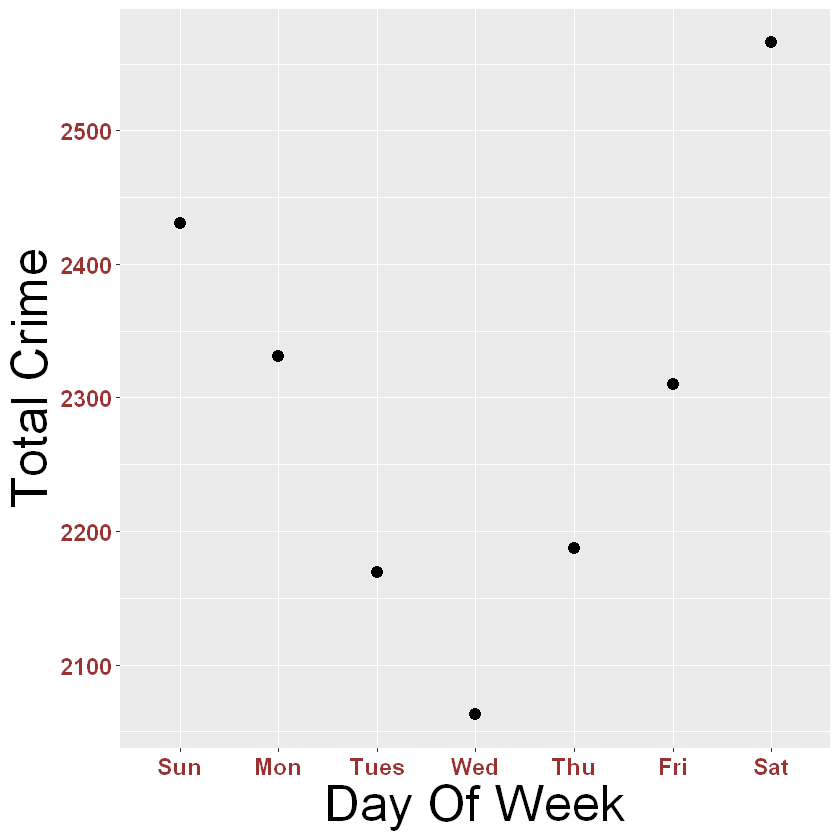

In [31]:
p <- ggplot(crime_by_day, aes(x=day_number, y=Total_Crime))
p + geom_point(size=3) + scale_x_discrete(labels=c("0" = "Sun", "1" = "Mon",
                              "2" = "Tues", "3" = "Wed", "4" = "Thu", "5" = "Fri", "6" = "Sat")) + theme(text = element_text(size=30), axis.text.x = element_text(face="bold", color="#993333", 
                           size=14, angle=0),
          axis.text.y = element_text(face="bold", color="#993333", 
                           size=14, angle=0)) + labs(x = "Day Of Week", y = "Total Crime")
